In [1]:
from __future__ import print_function

import pandas as pd 
from glob import glob
import logging
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.linear_model import  HuberRegressor, Ridge
import seaborn as sns
import altair as alt 

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline    
from somacaller.model import SomaModel
from somacaller.model import bam_read_count,slop_bedfile, read_bedfile

In [3]:
HG19 =  "/mnt/R60/bioinformatique/hg19/hg19.fasta"
HOTSPOT = "/home/sacha/Dev/somacaller/somacaller/hotspot.bed"

In [22]:
model = SomaModel(HOTSPOT, HG19)
model.from_hdf("data3.h5")

INFO:root:create linear model: chr7:55241707
INFO:root:create linear model: chr7:55241708
INFO:root:create linear model: chr7:55259515
INFO:root:create linear model: chr7:55249071
INFO:root:create linear model: chr12:25398285
INFO:root:create linear model: chr12:25398284
INFO:root:create linear model: chr12:25398281
INFO:root:create linear model: chr12:25398280
INFO:root:create linear model: chr12:25398283
INFO:root:create linear model: chr12:25398282
INFO:root:create linear model: chr7:55242473
INFO:root:create linear model: chr7:55242472
INFO:root:create linear model: chr7:55242471
INFO:root:create linear model: chr7:55242470
INFO:root:create linear model: chr7:55242474
INFO:root:create linear model: chr3:178921552
INFO:root:create linear model: chr3:178927981
INFO:root:create linear model: chr3:178936083
INFO:root:create linear model: chr3:178952086
INFO:root:create linear model: chr2:29445274
INFO:root:create linear model: chr2:29445270
INFO:root:create linear model: chr2:29445258


In [5]:
model.info()

{'hotspot_file': '/home/sacha/Dev/somacaller/somacaller/hotspot.bed',
 'reference_file': '/mnt/R60/bioinformatique/hg19/hg19.fasta',
 'bam_files': []}

In [18]:

model = SomaModel(HOTSPOT, HG19)
model.fit(glob("/home/sacha/nas/projects/somatic/ATC/*.bam")[:5])
model.to_hdf("data3.h5")

INFO:root:reads bam depths
DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_001_R_2019_09_12_13_15_05_user_OUE-918-2019-09-11_P2-S37_Cancero_ampliseq_318_Auto_user_OUE-918-2019-09-11_P2-S37_Cancero_ampliseq_318_325.bam
DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_001_R_2019_11_07_09_16_03_user_OUE-947-2019-11-06_S45_Cancero_ampliseq_318_Auto_user_OUE-947-2019-11-06_S45_Cancero_ampliseq_318_356.bam
DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_002_R_2019_11_07_09_16_03_user_OUE-947-2019-11-06_S45_Cancero_ampliseq_318_Auto_user_OUE-947-2019-11-06_S45_Cancero_ampliseq_318_356.bam
DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_002_R_2020_06_25_08_39_06_user_OUE-1064-20200624-S26-Cancero_ampliseq_318_Auto_user_OUE-1064-20200624-S26-Cancero_ampliseq_318_481.bam
DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_002_R_2020_07_18_08_38_10_user_OUE-1076-2020-0

In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

df = model.raw_data.query("id == 'chr12:25398284'")[["depth", "second_vaf"]].copy()

X = df.values

clf = make_pipeline( IsolationForest())

clf.fit(X)
df["p"]= clf.decision_function(X)


alt.Chart(df).mark_point().encode(x="depth", y="second_vaf", color="p", tooltip="p").interactive()

alt.Chart(...)

In [74]:
model = SomaModel.from_hdf("somacaller/data3.h5")

INFO:root:create linear model: chr7:55241707
INFO:root:create linear model: chr7:55241708
INFO:root:create linear model: chr7:55259515
INFO:root:create linear model: chr7:55249071
INFO:root:create linear model: chr12:25398285
INFO:root:create linear model: chr12:25398284
INFO:root:create linear model: chr12:25398281
INFO:root:create linear model: chr12:25398280
INFO:root:create linear model: chr12:25398283
INFO:root:create linear model: chr12:25398282
INFO:root:create linear model: chr7:55242473
INFO:root:create linear model: chr7:55242472
INFO:root:create linear model: chr7:55242471
INFO:root:create linear model: chr7:55242470
INFO:root:create linear model: chr7:55242474
INFO:root:create linear model: chr3:178921552
INFO:root:create linear model: chr3:178927981
INFO:root:create linear model: chr3:178936083
INFO:root:create linear model: chr3:178952086
INFO:root:create linear model: chr2:29445274
INFO:root:create linear model: chr2:29445270
INFO:root:create linear model: chr2:29445258


In [142]:
model.plot("chr7:55249071", a).interactive()

alt.LayerChart(...)

In [141]:
model.raw_data

,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
0,0,chr12,25398275,KRAS,30191,0,30165,1,20,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30165.0,20.0,C,T,0.276195,chr12:25398275,False
1,1,chr12,25398276,KRAS,30182,0,30169,3,10,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30169.0,10.0,C,T,0.779350,chr12:25398276,False
2,2,chr12,25398277,KRAS,30173,6,68,0,30099,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30099.0,68.0,T,C,0.405977,chr12:25398277,False
3,3,chr12,25398278,KRAS,30172,30136,1,35,0,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30136.0,35.0,A,G,0.183122,chr12:25398278,False
4,4,chr12,25398279,KRAS,30165,1,30146,1,17,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30146.0,17.0,C,T,0.590724,chr12:25398279,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48847,48847,chr7,55259516,EGFR,18877,12,0,18757,107,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18757.0,107.0,G,T,0.471654,chr7:55259516,False
48848,48848,chr7,55259517,EGFR,18879,20,1,18857,1,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18857.0,20.0,G,A,0.530406,chr7:55259517,False
48849,48849,chr7,55259518,EGFR,18884,2,18859,8,14,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,14.0,C,T,1.280672,chr7:55259518,False
48850,48850,chr7,55259519,EGFR,18889,4,18859,3,8,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,8.0,C,T,1.456565,chr7:55259519,False


In [22]:
ipp = pd.read_csv("ipp_atc.csv")
MM = ipp[["ECHANTILLON2", "IPP"]].set_index("ECHANTILLON2").to_dict()["IPP"]



In [43]:
ipp[["ECHANTILLON2", "IPP"]].groupby("IPP").agg(["count","first"])

ECHANTILLON2                    
                 count               first
IPP                                       
000005731            6           ATC200035
000024687           36           ATC170183
000034207           15           ATC170163
000043309           12           ATC180079
000051884            6           ATC170081
...                ...                 ...
101853632            6           ATC200040
101856001            2           ATC200052
101857008            5           ATC200046
1879544              5           ATC180143
IPP (pat)            1  Echantillon (dem1)

[142 rows x 2 columns]

In [34]:
model.raw_data["s"] = model.raw_data["sample"].str.replace(r"SM:(.+)-\d", "\\1")
model.raw_data["ipp"] = model.raw_data["s"].map(MM)

In [53]:
model.raw_data.query("sample =='SM:ATC190049-2'")["file"].unique()

array(['IonXpress_020_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam'],
      dtype=object)

In [52]:
model.plot("chr7:55249071").interactive(  bind_x = False)

alt.LayerChart(...)

In [53]:
model.test("")

,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
0,0,chr12,25398275,KRAS,30191,0,30165,1,20,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30165.0,20.0,C,T,0.276195,chr12:25398275,False
1,1,chr12,25398276,KRAS,30182,0,30169,3,10,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30169.0,10.0,C,T,0.779350,chr12:25398276,False
2,2,chr12,25398277,KRAS,30173,6,68,0,30099,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30099.0,68.0,T,C,0.405977,chr12:25398277,False
3,3,chr12,25398278,KRAS,30172,30136,1,35,0,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30136.0,35.0,A,G,0.183122,chr12:25398278,False
4,4,chr12,25398279,KRAS,30165,1,30146,1,17,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30146.0,17.0,C,T,0.590724,chr12:25398279,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48847,48847,chr7,55259516,EGFR,18877,12,0,18757,107,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18757.0,107.0,G,T,0.471654,chr7:55259516,False
48848,48848,chr7,55259517,EGFR,18879,20,1,18857,1,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18857.0,20.0,G,A,0.530406,chr7:55259517,False
48849,48849,chr7,55259518,EGFR,18884,2,18859,8,14,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,14.0,C,T,1.280672,chr7:55259518,False
48850,48850,chr7,55259519,EGFR,18889,4,18859,3,8,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,8.0,C,T,1.456565,chr7:55259519,False


In [194]:
import math
def entropy(s):
    H = 0
    total = sum(s)
    for i in s:
        i = i+1
        p = i / total
        H += math.log2(p) * p
    return -H


In [191]:
from somacaller.model import entropy
data = model.raw_data.copy()
data["entropy"] = data.filter(regex="(A|C|G|T)").apply(lambda x: entropy(x.nsmallest(3)), axis=1).abs()


In [192]:
data

,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
0,0,chr12,25398275,KRAS,30191,0,30165,1,20,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30165.0,20.0,C,T,0.658351,chr12:25398275,False
1,1,chr12,25398276,KRAS,30182,0,30169,3,10,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30169.0,10.0,C,T,1.121641,chr12:25398276,False
2,2,chr12,25398277,KRAS,30173,6,68,0,30099,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30099.0,68.0,T,C,0.537700,chr12:25398277,False
3,3,chr12,25398278,KRAS,30172,30136,1,35,0,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30136.0,35.0,A,G,0.461882,chr12:25398278,False
4,4,chr12,25398279,KRAS,30165,1,30146,1,17,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,30146.0,17.0,C,T,0.865857,chr12:25398279,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48847,48847,chr7,55259516,EGFR,18877,12,0,18757,107,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18757.0,107.0,G,T,0.556692,chr7:55259516,False
48848,48848,chr7,55259517,EGFR,18879,20,1,18857,1,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18857.0,20.0,G,A,0.794310,chr7:55259517,False
48849,48849,chr7,55259518,EGFR,18884,2,18859,8,14,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,14.0,C,T,1.351644,chr7:55259518,False
48850,48850,chr7,55259519,EGFR,18889,4,18859,3,8,IonXpress_096_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-2-NL,18859.0,8.0,C,T,1.495538,chr7:55259519,False


In [196]:
entropy([4,3,8])

1.479004348902381

,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
39516,39516,chr7,55249067,EGFR,8683,8676,0,7,0,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8676.0,7.0,A,G,0.000000,chr7:55249067,False
39517,39517,chr7,55249068,EGFR,8684,0,16,0,8668,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8668.0,16.0,T,C,0.000000,chr7:55249068,False
39518,39518,chr7,55249069,EGFR,8681,0,8679,0,2,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8679.0,2.0,C,T,0.000000,chr7:55249069,False
39519,39519,chr7,55249070,EGFR,8681,8664,0,17,0,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8664.0,17.0,A,G,0.000000,chr7:55249070,False
39520,39520,chr7,55249071,EGFR,8677,0,8173,0,499,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8173.0,499.0,C,T,0.000000,chr7:55249071,True
39521,39521,chr7,55249072,EGFR,8672,10,0,8657,5,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8657.0,10.0,G,A,0.918296,chr7:55249072,False
39522,39522,chr7,55249073,EGFR,8673,0,8668,0,5,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8668.0,5.0,C,T,0.000000,chr7:55249073,False
39523,39523,chr7,55249074,EGFR,8672,8651,0,14,5,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8651.0,14.0,A,G,0.831474,chr7:55249074,False
39524,39524,chr7,55249075,EGFR,8673,6,0,8667,0,IonXpress_081_R_2019_07_11_09_01_37_user_OUE-8...,SM:ATC190048-1,8667.0,6.0,G,A,0.000000,chr7:55249075,False


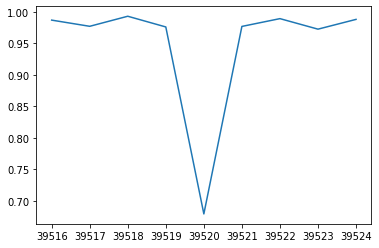

In [206]:
data = model.raw_data.query("sample == 'SM:ATC190048-1'").query("chrom == 'chr7' & pos > 55249071 - 5 &  pos < 55249071 + 5")
e = data.filter(regex="(A|C|G|T)").apply(lambda x: entropy(x.nsmallest(4)), axis=1).abs()
e = 1 - e
e.plot(kind="line")

data

In [71]:
### from sklearn.linear_model import LogisticRegression,SGDClassifier

data = model.target_data().query(f"id == 'chr7:55241707'")

x = data["depth"].values.reshape(-1,1)
y = data["second_vaf"].values



lr = LogisticRegression()

lr.fit(x,y)




data
# x = np.arange(data["depth"].min(), data["depth"].max(), 1000).reshape(-1,1)
# y = lr.predict(x)

#chart = alt.Chart(data).mark_point().encode(x="depth",y="second_vaf", color="outlier").interactive()
# line = pd.DataFrame({"x":x.reshape(-1), "y":y})
# chart += alt.Chart(line).mark_line().encode(x="x:Q",y="y:Q")

#chart




,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
20,163,chr7,55241707,EGFR,17614,4,1,17609,0,IonXpress_001_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-2,17609.0,4.0,G,A,0.721928,chr7:55241707,True
49,370,chr7,55241707,EGFR,6654,2,0,6652,0,IonXpress_001_R_2019_11_07_09_16_03_user_OUE-9...,SM:ATC190081-1,6652.0,2.0,G,A,0.000000,chr7:55241707,True
78,577,chr7,55241707,EGFR,6141,1,0,6140,0,IonXpress_002_R_2019_11_07_09_16_03_user_OUE-9...,SM:ATC190081-2,6140.0,1.0,G,A,0.000000,chr7:55241707,True
107,784,chr7,55241707,EGFR,0,0,0,0,0,IonXpress_002_R_2020_06_25_08_39_06_user_OUE-1...,SM:ATC200093-1,0.0,0.0,A,C,0.000000,chr7:55241707,True
136,991,chr7,55241707,EGFR,12462,7,0,12455,0,IonXpress_002_R_2020_07_18_08_38_10_user_OUE-1...,SM:ATC200102-1,12455.0,7.0,G,A,0.000000,chr7:55241707,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,47980,chr7,55241707,EGFR,22307,3,0,22303,1,IonXpress_095_R_2019_12_12_14_10_53_user_OUE-9...,SM:ATC190101-1-NL,22303.0,3.0,G,A,0.811278,chr7:55241707,True
6748,48187,chr7,55241707,EGFR,0,0,0,0,0,IonXpress_095_R_2020_01_10_13_55_22_user_OUE-9...,SM:ATC200001-2,0.0,0.0,A,C,0.000000,chr7:55241707,True
6777,48394,chr7,55241707,EGFR,17308,5,0,17303,0,IonXpress_096_R_2019_09_12_13_15_05_user_OUE-9...,SM:ATC190063-1,17303.0,5.0,G,A,0.000000,chr7:55241707,True
6806,48601,chr7,55241707,EGFR,9522,4,0,9517,1,IonXpress_096_R_2019_11_07_09_16_03_user_OUE-9...,SM:ATC190080-2,9517.0,4.0,G,A,0.721928,chr7:55241707,True


In [ ]:
data

In [66]:
pos = model.hotspot.index[0]
pos = 55241707

<AxesSubplot:ylabel='Frequency'>

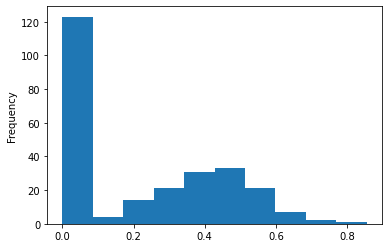

In [85]:
def merge_entropy(df):
    df = df[(df["pos"] != pos) & (df["pos"].between(pos - 5, pos + 5))]
    return pd.Series({"mean" : df["entropy"].mean(), "std": 3})

testing.groupby("file").apply(merge_entropy)["mean"].plot(kind="hist")

In [97]:
df["hotspot"] = df["id"].isin(model.hotspot.index)
df

/rawdata/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,hotspot
0,0,chr12,25398275,KRAS,12955,1,12918,0,32,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12918.0,32.0,C,T,0.195909,chr12:25398275,False
1,1,chr12,25398276,KRAS,12954,0,12951,0,3,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12951.0,3.0,C,T,-0.000000,chr12:25398276,False
2,2,chr12,25398277,KRAS,12953,3,35,0,12915,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12915.0,35.0,T,C,0.398459,chr12:25398277,False
3,3,chr12,25398278,KRAS,12955,12930,1,23,1,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12930.0,23.0,A,G,0.482179,chr12:25398278,False
4,4,chr12,25398279,KRAS,12954,0,12951,0,3,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12951.0,3.0,C,T,-0.000000,chr12:25398279,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,chr7,55259516,EGFR,18300,14,2,18279,5,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18279.0,14.0,G,A,1.206003,chr7:55259516,False
203,203,chr7,55259517,EGFR,18298,31,0,18267,0,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18267.0,31.0,G,A,-0.000000,chr7:55259517,False
204,204,chr7,55259518,EGFR,18300,1,18283,1,14,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18283.0,14.0,C,T,0.668564,chr7:55259518,False
205,205,chr7,55259519,EGFR,18302,3,18287,1,11,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18287.0,11.0,C,T,1.052982,chr7:55259519,False


In [89]:
df = testing[testing["file"] == testing["file"][0]]

In [91]:
def merge_entropy(df):
    df = df[(df["pos"] != pos) & (df["pos"].between(pos - 5, pos + 5))]
    return pd.Series({"mean" : df["entropy"].mean(), "std": 3})

df.apply(merge_entropy)["mean"].plot(kind="hist")

,index,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id
0,0,chr12,25398275,KRAS,12955,1,12918,0,32,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12918.0,32.0,C,T,0.195909,chr12:25398275
1,1,chr12,25398276,KRAS,12954,0,12951,0,3,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12951.0,3.0,C,T,-0.000000,chr12:25398276
2,2,chr12,25398277,KRAS,12953,3,35,0,12915,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12915.0,35.0,T,C,0.398459,chr12:25398277
3,3,chr12,25398278,KRAS,12955,12930,1,23,1,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12930.0,23.0,A,G,0.482179,chr12:25398278
4,4,chr12,25398279,KRAS,12954,0,12951,0,3,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,12951.0,3.0,C,T,-0.000000,chr12:25398279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,chr7,55259516,EGFR,18300,14,2,18279,5,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18279.0,14.0,G,A,1.206003,chr7:55259516
203,203,chr7,55259517,EGFR,18298,31,0,18267,0,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18267.0,31.0,G,A,-0.000000,chr7:55259517
204,204,chr7,55259518,EGFR,18300,1,18283,1,14,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18283.0,14.0,C,T,0.668564,chr7:55259518
205,205,chr7,55259519,EGFR,18302,3,18287,1,11,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,SM:ATC200031-1,18287.0,11.0,C,T,1.052982,chr7:55259519


In [108]:
ee = df.groupby("id").apply(lambda x: x.query("hotspot == False")["entropy"].mean())

In [142]:
def merge_entropy(x,chrom, pos, slop = 5):
    x = x[(x["chrom"] == chrom) & (x["pos"] != pos) & (x["pos"].between(pos - slop, pos + slop))]
    return pd.Series({"mean" : x["entropy"].mean(), "std": x["entropy"].std()})

In [143]:
tt  = model._create_target(df.copy())

In [144]:
merge_entropy(df,"chr12",25398280)

mean    0.440543
std     0.344359
dtype: float64

In [60]:
a = model.test("/home/sacha/nas/projects/somatic/ATC/IonXpress_020_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam")

#a = a[a.depth > 1]
#a = a[~a["name"].str.contains("Del")]
#test = a[["id","name","depth","second_vaf","af","entropy","z_linear","outlier"]].copy().style

#test = test.applymap(lambda x: "background-color:red" if x > 1 else "background-color:green" , subset = ["af"])
#test = test.applymap(lambda x: "background-color:red" if x > 2 else "background-color:green" , subset = ["z_linear"])
#test = test.applymap(lambda x: "background-color:red" if x > 0.5 else "background-color:green" , subset = ["outlier"])

#test

DEBUG:root:process bamfile: /home/sacha/nas/projects/somatic/ATC/IonXpress_020_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam
DEBUG:root:process sample: SM:ATC190049-2
/home/sacha/Dev/somacaller/somacaller/model.py:355: RuntimeWarning: invalid value encountered in double_scalars
  return abs(y_pred - y) / std


In [63]:
a

,chrom,pos,name,depth,A,C,G,T,file,sample,first_vaf,second_vaf,first,second,entropy,id,af,z_linear,outlier
0,chr12,25398280,KRAS,18425.0,6.0,0.0,18419.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18419.0,6.0,G,A,0.986427,chr12:25398280,0.032564,6.028390e-01,2.018244e-02
1,chr12,25398281,KRAS,18424.0,0.0,18416.0,0.0,8.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18416.0,8.0,C,T,0.865857,chr12:25398281,0.043422,8.839318e-02,3.892355e-02
2,chr12,25398282,KRAS,18424.0,0.0,18420.0,0.0,4.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18420.0,4.0,C,T,1.148835,chr12:25398282,0.021711,5.917756e-01,2.651604e-02
3,chr12,25398283,KRAS,18421.0,18370.0,17.0,34.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18370.0,34.0,A,G,1.040377,chr12:25398283,0.184572,3.804711e-01,2.980791e-02
4,chr12,25398284,KRAS,18418.0,0.0,18412.0,0.0,5.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18412.0,5.0,C,T,1.061278,chr12:25398284,0.027147,1.163548e-03,8.934001e-02
5,chr12,25398285,KRAS,18405.0,0.0,18398.0,0.0,7.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,18398.0,7.0,C,T,0.921928,chr12:25398285,0.038033,5.491154e-03,9.317263e-02
6,chr2,29443600,ALK,0.0,0.0,0.0,0.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,0.0,0.0,A,C,1.584963,chr2:29443600,NaN,6.561396e-09,1.586029e-01
7,chr2,29443613,ALK,0.0,0.0,0.0,0.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,0.0,0.0,A,C,1.584963,chr2:29443613,NaN,3.188231e-07,1.607323e-01
8,chr2,29443625,ALK,0.0,0.0,0.0,0.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,0.0,0.0,A,C,1.584963,chr2:29443625,NaN,8.228258e-09,1.517636e-01
9,chr2,29443631,ALK,0.0,0.0,0.0,0.0,0.0,IonXpress_020_R_2019_07_18_13_26_07_user_OUE-8...,SM:ATC190049-2,0.0,0.0,A,C,1.584963,chr2:29443631,NaN,1.824212e-07,1.693896e-01


,id,name,depth,second_vaf,af,entropy,z_linear,outlier
0,chr7:55241707,EGFR,25234.000000,5415.000000,21.459142,0.011527,4.539803,0.233099
5,chr12:25398284,KRAS,21268.000000,329.000000,1.546925,0.059269,0.633662,0.048947
6,chr12:25398281,KRAS,21278.000000,6.000000,0.028198,0.811278,0.840459,0.055968
7,chr12:25398280,KRAS,21285.000000,11.000000,0.051680,0.000000,0.581178,0.026502
8,chr12:25398283,KRAS,21275.000000,31.000000,0.145711,0.626995,0.168594,0.032296
9,chr12:25398282,KRAS,21275.000000,12.000000,0.056404,0.391244,0.269484,0.073038
10,chr7:55242473,DelE19,27336.000000,4.000000,0.014633,1.251629,0.184411,0.041894
11,chr7:55242472,DelE19,27343.000000,52.000000,0.190177,0.638985,0.479678,0.057321
12,chr7:55242471,DelE19,27343.000000,11.000000,0.040230,0.413817,0.796711,0.069283
13,chr7:55242470,DelE19,27343.000000,6.000000,0.021943,0.970951,0.722003,0.065500


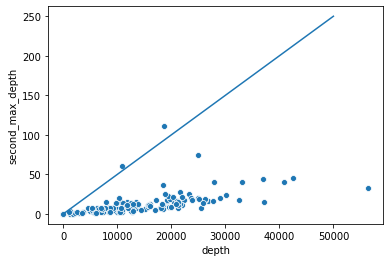

In [444]:
from sklearn import linear_model
import seaborn as sns
data = hotspot.query("id == 'chr12:25398280'")

X = data["depth"].values.reshape(-1,1)
Y = data["second_max_depth"].values


x = np.arange(0, 50000)
y = x *5 / 1000



sns.scatterplot(x="depth", y = "second_max_depth", data=data)

plt.plot(x,y)


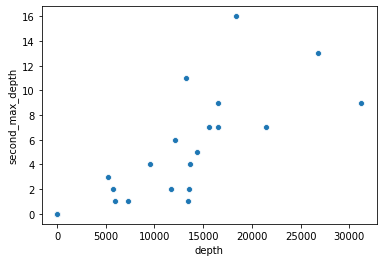

In [439]:
sns.scatterplot(x="depth", y="second_max_depth", data=model.target_data().query("id == 'chr2:29443613' "))

In [434]:
model._create_models()

INFO:root:create linear model: chr7:55241707
INFO:root:create linear model: chr7:55241708
INFO:root:create linear model: chr7:55259515
INFO:root:create linear model: chr7:55249071
INFO:root:create linear model: chr12:25398285
INFO:root:create linear model: chr12:25398284
INFO:root:create linear model: chr12:25398281
INFO:root:create linear model: chr12:25398280
INFO:root:create linear model: chr12:25398283
INFO:root:create linear model: chr12:25398282
INFO:root:create linear model: chr7:55242473
INFO:root:create linear model: chr7:55242472
INFO:root:create linear model: chr7:55242471
INFO:root:create linear model: chr7:55242470
INFO:root:create linear model: chr7:55242474
INFO:root:create linear model: chr3:178921552
INFO:root:create linear model: chr3:178927981
INFO:root:create linear model: chr3:178936083
INFO:root:create linear model: chr3:178952086
INFO:root:create linear model: chr2:29445274
INFO:root:create linear model: chr2:29445270
INFO:root:create linear model: chr2:29445258


In [424]:
model.plot("test.png", "chr12:25398284")

alt.LayerChart(...)

In [ ]:
pos = "chr12:25398284"
df = model.target_data().query(f"id == '{pos}'")[["depth","second_max_depth"]]

import altair as alt

b = pd.DataFrame(model.outlier_models[pos]["minmaxscaler"].transform(df))
b.columns = ["x","y"]
alt.Chart(b).mark_point().encode(x="x",y="y")


In [178]:
test = model.test("IonXpress_018_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam")

DEBUG:root:process bamfile: IonXpress_018_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam
DEBUG:root:process sample: 


something is wrong with IonXpress_018_R_2019_07_18_13_26_07_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_Auto_user_OUE-888-20190717_S29_P2_Cancero_ampliseq_318_287.bam


In [437]:
test

,chr,pos,name,depth,A,C,G,T,file,sample,first_max_depth,second_max_depth,id,af,z_linear,outlier
0,chr7,55241707,EGFR,35407.0,6112.0,11.0,29284.0,0.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,29284.0,6112.0,chr7:55241707,17.262123,4.892569,0.344164
5,chr12,25398284,KRAS,27683.0,0.0,27438.0,0.0,245.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,27438.0,245.0,chr12:25398284,0.885020,0.347412,0.059102
6,chr12,25398281,KRAS,27692.0,0.0,27673.0,2.0,16.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,27673.0,16.0,chr12:25398281,0.057778,0.353056,0.104519
7,chr12,25398280,KRAS,27698.0,16.0,1.0,27681.0,0.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,27681.0,16.0,chr12:25398280,0.057766,0.618718,0.047360
8,chr12,25398283,KRAS,27685.0,27643.0,3.0,39.0,0.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,27643.0,39.0,chr12:25398283,0.140871,0.290520,0.082350
9,chr12,25398282,KRAS,27687.0,4.0,27677.0,0.0,6.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,27677.0,6.0,chr12:25398282,0.021671,1.130684,0.097691
10,chr7,55242473,DelE19,56372.0,1.0,0.0,56370.0,0.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,56370.0,1.0,chr7:55242473,0.001774,1.679295,0.242878
11,chr7,55242472,DelE19,56373.0,56313.0,2.0,55.0,3.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,56313.0,55.0,chr7:55242472,0.097564,1.342135,0.246176
12,chr7,55242471,DelE19,56374.0,56336.0,6.0,27.0,0.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,56336.0,27.0,chr7:55242471,0.047894,1.168471,0.275348
13,chr7,55242470,DelE19,56376.0,1.0,9.0,0.0,56364.0,IonXpress_018_R_2019_07_18_13_26_07_user_OUE-8...,SM:T POS ATC,56364.0,9.0,chr7:55242470,0.015964,1.902023,0.270823


In [400]:
model._predict_regression_score(35407,29284, "chr7:55241707")

array([27.73965951])

In [22]:
model._create_target_data(model.raw_data).loc["chr7:55241707"]

,chr,pos,ref,depth,A,C,G,T,file,first_max_depth,second_max_depth
id,,,,,,,,,,,
chr7:55241707,chr7,55241707,G,17526,24,0,17502,0,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,17502,24
chr7:55241707,chr7,55241707,G,17526,24,0,17502,0,IonXpress_034_R_2020_02_27_14_11_38_user_OUE-1...,17502,24
chr7:55241707,chr7,55241707,G,31164,47,0,31115,2,IonXpress_033_R_2020_02_27_14_11_38_user_OUE-1...,31115,47
chr7:55241707,chr7,55241707,G,31164,47,0,31115,2,IonXpress_033_R_2020_02_27_14_11_38_user_OUE-1...,31115,47
chr7:55241707,chr7,55241707,G,11546,7,0,11539,0,IonXpress_028_R_2020_02_27_14_11_38_user_OUE-1...,11539,7
...,...,...,...,...,...,...,...,...,...,...,...
chr7:55241707,chr7,55241707,G,19880,3850,2,16028,0,IonXpress_069_R_2020_01_30_09_56_58_user_OUE-9...,16028,3850
chr7:55241707,chr7,55241707,G,9625,1848,1,7775,1,IonXpress_066_R_2020_01_10_13_55_22_user_OUE-9...,7775,1848
chr7:55241707,chr7,55241707,G,9625,1848,1,7775,1,IonXpress_066_R_2020_01_10_13_55_22_user_OUE-9...,7775,1848


In [421]:
model._predict_outlier_score(17526,24,"chr7:55241707")

17525.39388244014
